# Data Analysis Code-Along

Implement the code-blocks below in order to explore some common data-analysis techniques. We will be using the `realestate.csv` file again.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [2]:
df = pd.read_csv("../data/realestate.csv")

In [3]:
# let's observe the head of this df and check out our new column "pet_friendly"
df.head()

,house age,distance_to_mrt,num_convenience_stores,price_per_unit_area,num_of_rooms,pet_friendly
0,19.5,306.5947,9.0,42.2,2,No
1,13.3,561.9845,5.0,47.3,2,No
2,13.3,561.9845,5.0,54.8,4,No
3,5.0,390.5684,5.0,43.1,3,No
4,7.1,2175.0300,3.0,32.1,3,Yes


In [7]:
# let's see the unique counts of "pet_friendly"
df.value_counts('pet_friendly')

pet_friendly
No     233
Yes    101
Name: count, dtype: int64

In [8]:
# just for good measure, let's check that there are no missing values
df["pet_friendly"].isna().sum()

0

TASK: Calculate the average house age, distance to mrt, number of convenience stores, and price per unit area for pet friendly and non-pet friendly apartments

In [25]:
df.groupby('pet_friendly')['distance_to_mrt'].mean()

pet_friendly
No      520.536241
Yes    1487.113683
Name: distance_to_mrt, dtype: float64

TASK: consider the differences in the above dataframe. Which type of apartment is cheaper and farther away from the MRT. How many rooms does a pet-friendly home have on average and which type of home is newer on average?

TASK: Let's create a pivot table where pet-friendly is the index, number of rooms are the columns, and the mean price_per_unit_area are the values

In [43]:
# Documentation: https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html#

pd.pivot_table(df, values="price_per_unit_area", index="pet_friendly", columns="num_of_rooms")

num_of_rooms,1,2,3,4,5,6
pet_friendly,,,,,,
No,35.059184,34.964286,44.654167,46.791228,56.386667,56.054545
Yes,26.368571,27.751613,43.576471,46.707143,NaN,51.225000


In [13]:
pd.pivot_table(df, values="price_per_unit_area", index="num_of_rooms", columns="pet_friendly")

pet_friendly,No,Yes
num_of_rooms,,
1,35.059184,26.368571
2,34.964286,27.751613
3,44.654167,43.576471
4,46.791228,46.707143
5,56.386667,NaN
6,56.054545,51.225000


TASK: remember, this is a dataframe! We can access individual columns to get a closer look at our sub-categories. Let's save this dataframe into a variable and get the column that describes "1-bedroom" apartments.

In [20]:
# save into a dataframe
df_pivot = pd.pivot_table(df, values="price_per_unit_area", index="pet_friendly", columns="num_of_rooms")

# print out column describing 1-bedroom apartments
df_pivot[1]

pet_friendly
No     35.059184
Yes    26.368571
Name: 1, dtype: float64

TASK: While this is more applicable when we have many index categories, we can also extract the index with the highest value. This is useful for presentation purposes and quick insight. Using the 'idmax()' function, get the index with the highest value in this series.

In [22]:
# Documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.idxmax.html

df_pivot[1].idxmax()

'No'

TASK: Apply the same idmax function to the entire pivot table:

In [46]:
...

num_of_rooms
1    No
2    No
3    No
4    No
5    No
6    No
dtype: object

TASK: While we have these two categorical columns, "num_of_rooms" and "pet_friendly", let's create one more categorical column called "proximity_to_mrt" that labels my sample as "far" or "near" to the closest mrt station. This is a relative term that I want to base around my distribution of values, so I'm going to use the `qcut` function to acheive this. 

Keep these differences in mind: `cut` is for when you want cuts based on even spacing of *values*. This could potentially lead to poor sampling (some cuts might have 0 values). However, this could be useful when you're interested in relative values (ex: how many americans make > 100k?).

`qcut` is used for even distributions of values and will ensure that each bin has the same amount of samples. 

In [28]:
df['proximity_to_mrt'] = pd.qcut(df['distance_to_mrt'], q=2, labels=['close','far'])

In [29]:
df.head()

,house age,distance_to_mrt,num_convenience_stores,price_per_unit_area,num_of_rooms,pet_friendly,proximity_to_mrt
0,19.5,306.5947,9.0,42.2,2,No,close
1,13.3,561.9845,5.0,47.3,2,No,far
2,13.3,561.9845,5.0,54.8,4,No,far
3,5.0,390.5684,5.0,43.1,3,No,close
4,7.1,2175.0300,3.0,32.1,3,Yes,far


TASK: Using this new column let's count up the relative frequency of "close" apartments that are both "pet friendly" and not "pet friendly" as well as the "far" apartments. We're going to use `value_counts` with `normalize=True` to observe the relative frequency to get a better judgement of these values.

In [31]:
df.value_counts(['proximity_to_mrt', 'pet_friendly'], normalize=True)

proximity_to_mrt  pet_friendly
close             No              0.425150
far               No              0.272455
                  Yes             0.227545
close             Yes             0.074850
Name: proportion, dtype: float64

In [48]:
# Documentation: https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html

...

proximity_to_mrt  pet_friendly
close             No              0.425150
far               No              0.272455
                  Yes             0.227545
close             Yes             0.074850
Name: proportion, dtype: float64

TASK: Let's express this value_counts dataframe as a bar chart in seaborn to view our relative proportions. Before we get to this however, we will call the `reset_index()` method to "unstack" our multi-dimensional indices and instead treat them like columns. This often makes it easier to work with a multi-dimensional dataset and instead "flattens" it out. We will call the same method as above (along with `reset_index()`) and save this into a new variable called `vis`.

In [34]:
vis = df.value_counts(['proximity_to_mrt', 'pet_friendly'], normalize=True).reset_index()



In [49]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html

...

,proximity_to_mrt,pet_friendly,proportion
0,close,No,0.425150
1,far,No,0.272455
2,far,Yes,0.227545
3,close,Yes,0.074850


TASK: Next, we call the seaborn `barplot` with params `data=vis`, `x="proxmitiy_to_mrt"`, and `y="proportion"`. This time however, we will add another "dimension" to our dataframe with `hue="pet_friendly"` to create two bar-charts for each category.

<Axes: xlabel='proximity_to_mrt', ylabel='proportion'>

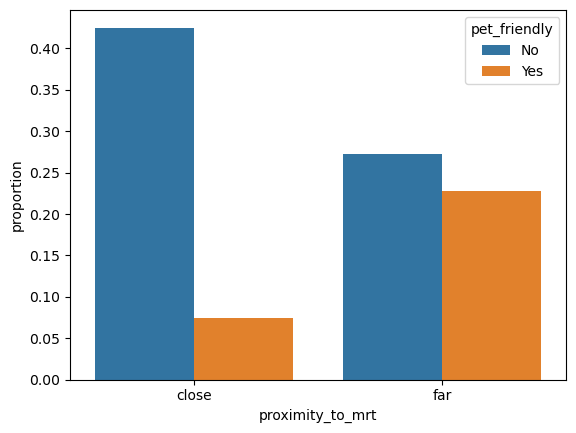

In [38]:
sns.barplot(data=vis, x="proximity_to_mrt", y="proportion", hue="pet_friendly")

TASK: To explore the relationship b/w pet-friendly and proximity to mrt a little further, let's create a pivot table to explore the **average** price of all combinations of these two columns.

In [40]:
pd.pivot_table(df, values='price_per_unit_area' , columns='proximity_to_mrt', index='pet_friendly')

proximity_to_mrt,close,far
pet_friendly,,
No,47.294366,36.924176
Yes,48.536000,28.544737


In [51]:
...

proximity_to_mrt,close,far
pet_friendly,,
No,47.294366,36.924176
Yes,48.536000,28.544737


In [41]:
df.head()

,house age,distance_to_mrt,num_convenience_stores,price_per_unit_area,num_of_rooms,pet_friendly,proximity_to_mrt
0,19.5,306.5947,9.0,42.2,2,No,close
1,13.3,561.9845,5.0,47.3,2,No,far
2,13.3,561.9845,5.0,54.8,4,No,far
3,5.0,390.5684,5.0,43.1,3,No,close
4,7.1,2175.0300,3.0,32.1,3,Yes,far


TASK: Let's create a pivot table to explore the **median** number of convenience stores across all categories pet-friendly and proximity to mrt apartments in this dataset.

In [46]:
pd.pivot_table(df, values='num_convenience_stores', columns='pet_friendly', index='proximity_to_mrt', aggfunc='median')

pet_friendly,No,Yes
proximity_to_mrt,,
close,6.0,6.0
far,4.0,3.0


In [45]:
pd.pivot_table(df, values='num_convenience_stores', columns='pet_friendly', index='proximity_to_mrt', aggfunc='median').T

proximity_to_mrt,close,far
pet_friendly,,
No,6.0,4.0
Yes,6.0,3.0


In [52]:
...

proximity_to_mrt,close,far
pet_friendly,,
No,6.0,4.0
Yes,6.0,3.0


## Confirming Hypothesis

As we saw in our box-plot, it seemed like the more rooms an apartment has, the more expensive it becomes:

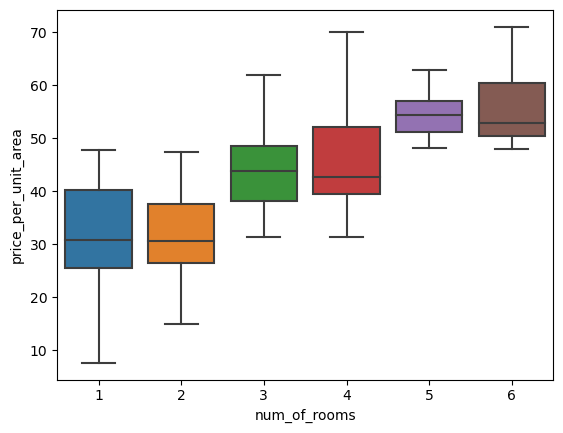

In [47]:
sns.boxplot(data=df, x="num_of_rooms", y="price_per_unit_area", showfliers=False)
plt.show()

As a word of warning, we do not want to immediately jump to statistical analyses in order to come to conclusions on our dataset. Instead, we want to operate off of [first-principles](https://en.wikipedia.org/wiki/First_principle). That is, use your domain knowledge: does it cost more effort and time to build an apartment with 6-rooms than 1-room? Do people "value" a 6-bedroom apartment over a 1-bedroom apartment? The visuals surely tell us so, and human intuition points to this too. So maybe it's not worth our time running a t-test on this, and we would be better off figuring out if other latent variables are influencing the price.

However, for the purpose of education, let's run a t-test anyway.

TASK: Create two new dataframes for only 6-bedroom apartments and 1-bedroom apartments, and save each respective dataframe into variables named `one_bed` and `six_bed` respectively. Use boolean indexing to accomplish this.

In [50]:
one_bed = df[df['num_of_rooms'] == 1]

six_bed = df[df['num_of_rooms'] == 6]

TASK: Observe the mean "price_per_unit_area" of both these dataframes.

In [55]:
one_bed['price_per_unit_area'].mean()

31.438095238095237

In [56]:
six_bed['price_per_unit_area'].mean()

55.31153846153846

TASK: What is a null hypothesis of this experiment regarding the difference of means between one-bedroom & six-bedroom apartments.

Null -> No difference between one and six-bedroom apartments

TASK: What is a alternative hypothesis of this experiment regarding the difference of means between one-bedroom & six-bedroom apartments.

Alternative -> There is a different in price between one and six-bedroom apartments

TASK: Calculate a two-tailed t-test on these two groups of means using the `ttest_ind` method on these two groups from the `scipy.stats` package. 

In [57]:
# Documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

from scipy import stats 

stats.ttest_ind(one_bed['price_per_unit_area'], six_bed['price_per_unit_area'])

TtestResult(statistic=-11.967344119522167, pvalue=1.6051886520177151e-21, df=108.0)

In [58]:
stats.ttest_ind(one_bed['price_per_unit_area'], six_bed['price_per_unit_area'])

TtestResult(statistic=-11.967344119522167, pvalue=1.6051886520177151e-21, df=108.0)

TASK: What can we state about the null hypothesis given this pvalue?

Answer here

WE can reject the null hypothesis and accept the alternative as being likely.